In [1]:
#Importo as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados dos combustíveis automotivos do 1º semestre de 2025
#https://dados.gov.br/dados/conjuntos-dados/serie-historica-de-precos-de-combustiveis-e-de-glp
#1o. Sem 2025 - Combustíveis Automotivos
dfBD = pd.read_csv("Preços semestrais - AUTOMOTIVOS_2025.01.csv", delimiter=";")
dfBD.head(2)

C:\Users\paulo.frederico\AppData\Local\Temp\ipykernel_27804\3989438415.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  dfBD = pd.read_csv("Preços semestrais - AUTOMOTIVOS_2025.01.csv", delimiter=";")


,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,"6,29",NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,"6,49",NaN,R$ / litro,RAIZEN


In [3]:
#Tenho que transformar a coluna "Valor de Venda" em FLOAT, pois ela está como STRING (porque está com vírgula no lugar de ponto)
dfBD['Valor de Venda'] = dfBD['Valor de Venda'].str.replace(',','.').astype(float)
dfBD.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,6.29,NaN,R$ / litro,RAIZEN
1,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA ADITIVADA,01/01/2025,6.49,NaN,R$ / litro,RAIZEN


In [4]:
#Seleciono somente os dados de GASOLINA
dfGasolinaBR = dfBD.loc[dfBD["Produto"] == "GASOLINA"]
dfGasolinaBR.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,SOBRAL,ECONOGÁS DO BRASIL DIST. DERIV. DE PET. BIOC. ...,08.775.979/0002-62,RUA TABELIÃO IDELFONSO CAVALCANTI,455,NaN,CENTRO,62010-000,GASOLINA,01/01/2025,6.29,NaN,R$ / litro,RAIZEN
4,NE,CE,SOBRAL,V.C.EMPREENDIMENTOS LTDA,03.551.935/0002-35,AVENIDA JOSE EUCLIDES FERREIRA GOMES,30,POSTO FLASH,CORACAO DE JESUS,62043-070,GASOLINA,01/01/2025,6.53,NaN,R$ / litro,RAIZEN


In [5]:
#Calculo a média do valor de venda por estado
dfValorVendaPorEstado = dfBD.groupby("Estado - Sigla")["Valor de Venda"].mean().reset_index()
dfValorVendaPorEstado

,Estado - Sigla,Valor de Venda
0,AC,7.423546
1,AL,6.019100
2,AM,6.804102
3,AP,6.238248
4,BA,6.016197
5,CE,6.120574
6,DF,6.148812
7,ES,5.937723
8,GO,5.789825
9,MA,6.025228


In [6]:
#Crio o array com os valores de venda por estado
arrayValorVendaPorEstado = np.array(dfValorVendaPorEstado["Valor de Venda"])
arrayValorVendaPorEstado

array([7.42354605, 6.0191002 , 6.80410155, 6.23824824, 6.01619653,
       6.12057423, 6.14881203, 5.93772332, 5.78982517, 6.0252278 ,
       5.73274206, 5.98498858, 5.75445724, 6.37038822, 5.78722022,
       5.86502136, 5.84214911, 5.90791845, 5.77703233, 6.08966516,
       6.72814982, 6.8396846 , 6.13463519, 6.10951308, 6.05974456,
       5.67257496, 6.05296635])

In [7]:
#Cálculo dos valores estatísticos
media = np.mean(arrayValorVendaPorEstado)
mediana = np.median(arrayValorVendaPorEstado)
q1 = np.percentile(arrayValorVendaPorEstado, 25)
q2 = np.percentile(arrayValorVendaPorEstado, 50)
q3 = np.percentile(arrayValorVendaPorEstado, 75)
distancia = (media - mediana) / mediana
iqr = q3 - q1
limSuperior = q3 + (1.5 * iqr)
limInferior = q1 - (1.5 * iqr)

print(f'Média     = {media:.2f}')
print(f'Mediana   = {mediana:.2f}')
print(f'Q1        = {q1:.2f}')
print(f'Q2        = {q2:.2f}')
print(f'Q3        = {q3:.2f}')
print(f'Distância = {distancia * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limSuperior:.2f}')
print(f'Lim. Inf. = {limInferior:.2f}')

Média     = 6.12
Mediana   = 6.03
Q1        = 5.85
Q2        = 6.03
Q3        = 6.14
Distância = 1.57 %
Lim. Sup. = 6.57
Lim. Inf. = 5.42


In [8]:
#OUTLIERs acima do limite superior
estadosOutliersLimSuperior = dfValorVendaPorEstado.loc[dfValorVendaPorEstado["Valor de Venda"] >= limSuperior]
estadosOutliersLimSuperior

,Estado - Sigla,Valor de Venda
0,AC,7.423546
2,AM,6.804102
20,RO,6.728150
21,RR,6.839685


In [9]:
# Identifique quais estados apresentam valores que se afastam do padrão nacional e proponha hipóteses
# para esses comportamentos. Considere aspectos como localização geográfica, logística e políticas regionais.
#
# RESPOSTA: Os estados do Acre (AC), Amazonas (AM), Rondônia (RO) e Roraima (RR) pertencem a região Norte do Brasil e
#           apareceram como OUTLIERs. Muito provavelmente isso ocorre por causa do elevado frete em decorrência
#           da distância entre os centros produtores de combustível.


# Ao final, discuta qual medida de tendência central melhor representa os preços dos combustíveis no Brasil e 
# justifique sua escolha com base na distribuição dos dados.
#
# RESPOSTA: A média representa melhor o comportamento dos valores de venda, pois a distância é de apenas 1,57%.
#           Essa informação nos afirma que a média é pouco influenciada por valores OUTLIERS.

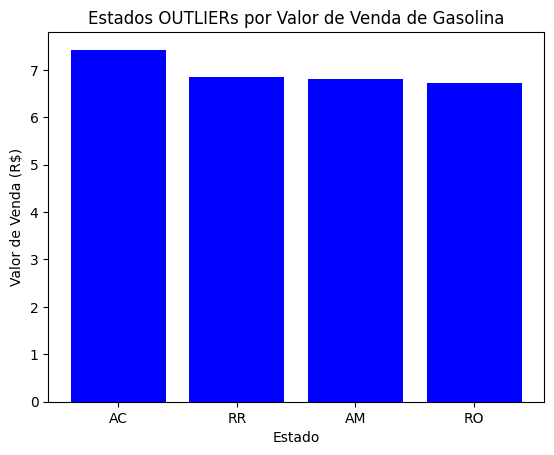

In [ ]:
#Ordeno pelo valor de venda antes de exibir no gráfico
estadosOutliersLimSuperior = estadosOutliersLimSuperior.sort_values('Valor de Venda', ascending=False)

#Gero o gráfico
plt.bar(estadosOutliersLimSuperior['Estado - Sigla'], estadosOutliersLimSuperior['Valor de Venda'], color='blue')
plt.title('Estados OUTLIERs por Valor de Venda de Gasolina')
plt.xlabel('Estado')
plt.ylabel('Valor de Venda (R$)')
plt.grid(False)
plt.show()